In [32]:
import pandas as pd
import numpy as np
from keras.models import load_model
from numpy import array
import os
from PIL import Image
from pickle import dump, load
import pickle
from time import time
from keras.preprocessing import sequence
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import tensorflow as tf

In [33]:
model = InceptionV3(weights='imagenet')
model_new = Model(model.input, model.layers[-2].output)
print("Model Running...")

Model Running...


In [44]:
def preprocess(image_path):
    path = image_path
#     img = image.load_img(path, target_size=(299, 299))
    img=cv2.imread(image_path)
    img=cv2.resize(img, (299,299))
#     x = image.img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    return x

In [45]:
def encode(image):
    image = preprocess(image)
    fea_vec = model_new.predict(image)
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1])
    return fea_vec

In [69]:
vocab = pd.read_csv("vocab.csv",names=[0])
vocab = np.array(vocab)

In [70]:
# Giving index no. to vocabulary of each words
ixtoword = {}
wordtoix = {}
ix = 1
for word in vocab:
    ixtoword[ix] = word[0]
    wordtoix[word[0]] = ix
    ix += 1
print(ixtoword[1])
print(wordtoix["startseq"])

startseq
1


In [71]:
model_1 = load_model("Model Saves\model_31.h5")

In [72]:
def greedySearch(photo):
    in_text = 'startseq'
    max_length = 34
    for i in range(max_length):
        sequence = [wordtoix[w] for w in in_text.split() if w in wordtoix]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model_1.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

In [75]:
import matplotlib.pyplot as plt
def predict(path):
    encoding_train = {}
    encoding_train[path] = encode(path)
#     encoding_train
    pic = list(encoding_train.keys())[0]
    image = encoding_train[pic].reshape((1,2048))
    x=plt.imread(pic)
    plt.imshow(x)
    plt.show()
    return greedySearch(image)

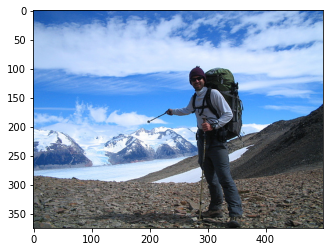

'man in red shirt is standing on top of snow covered mountaintop'

In [80]:
predict("Test.jpg")